In [1]:
import pandas as pd
import matplotlib as plt

# Loading Data

The data is from the Lending Club (P2P loan) consumer lending data

In [2]:
file_path = "./data/loan_data_2007_2014.csv"
df = pd.read_csv(filepath_or_buffer = file_path)

/var/folders/rp/svy321qd3lv_hlkfndpyd3hr0000gn/T/ipykernel_38696/1680365798.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer = file_path)


In [9]:
pd.options.display.max_columns = None
df.head(5) # taking a sneak peak on the data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [12]:
s_no_value_pct = df.isnull().mean()
col_to_exclude = s_no_value_pct[s_no_value_pct > 0.8].index.to_list() # list columns that are mostly nulls
col_to_exclude

[]

In [13]:
df = df.loc[:, ~df.columns.isin(col_to_exclude)]

In [14]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [15]:
# take a look at the loan_status column and decide on the prediction variable.
df.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

# Preprocessing

Clean up update, creating label column and drop columns

In [16]:
# Making an assumption here, assuming we are predicting anything charged off
default_loan_status = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']
early_dlq = ["In Grace Period", "Late (16-30 days)"]

df['label'] = df.loan_status.map(lambda x: 1 if x in default_loan_status else 0)
df['early_dlq'] = df.loan_status.map(lambda x: 1 if x in early_dlq else 0)

In [17]:
df.drop(['loan_status'], axis = 1, inplace = True)

In [18]:
# look at the columns again, and drop columns which may not make sene
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'label', 'early_dlq'],
      dtype='ob

In [19]:
free_text_columns = ['url', 'desc', 'title'] # dropping some free text columns
future_events = ['recoveries', 'next_pymnt_d', 'collection_recovery_fee', 'collections_12_mths_ex_med'] # dropping future events or events after default
location_info = ['zip_code', 'addr_state']
identity_columns = ['id', 'member_id']

In [20]:
df.drop(free_text_columns + future_events + location_info + identity_columns, axis = 1, inplace = True) # drop irrelavent columns

## Take a look at all string data

In [21]:
df.select_dtypes(include=[object]).head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,B,B2,NaN,10+ years,RENT,Verified,Dec-11,n,credit_card,Jan-85,f,Jan-15,Jan-16,INDIVIDUAL
1,60 months,C,C4,Ryder,< 1 year,RENT,Source Verified,Dec-11,n,car,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,C,C5,NaN,10+ years,RENT,Not Verified,Dec-11,n,small_business,Nov-01,f,Jun-14,Jan-16,INDIVIDUAL
3,36 months,C,C1,AIR RESOURCES BOARD,10+ years,RENT,Source Verified,Dec-11,n,other,Feb-96,f,Jan-15,Jan-15,INDIVIDUAL
4,60 months,B,B5,University Medical Group,1 year,RENT,Source Verified,Dec-11,n,other,Jan-96,f,Jan-16,Jan-16,INDIVIDUAL


In [22]:
# looks like emp_title is free text as well, it is not these field are not useful, but let's ignore the processing for now.
print(df.emp_title.value_counts())
df.drop(['emp_title'], axis = 1, inplace = True)

Teacher                              5399
Manager                              4438
Registered Nurse                     2316
RN                                   2204
Supervisor                           1967
                                     ... 
The Eastern Arizona AHEC                1
Delaware Quarries.com                   1
McCauley trucking and warehousing       1
save mart supermarkets                  1
Server Engineer Lead                    1
Name: emp_title, Length: 205475, dtype: int64


In [23]:
df.emp_length.value_counts() # looks like emp_length are ordinal

import re, numpy as np
def process_emp_length(x):
  if pd.isnull(x):
    return 0
  match = re.search(r'\d+', x)
  if match:
    return int(match.group())
  else:
    return 0

df["emp_length"] = df.emp_length.map(process_emp_length)

df.emp_length.value_counts()

10    150049
1      65887
2      41373
3      36596
5      30774
4      28023
7      26180
6      26112
8      22395
0      21008
9      17888
Name: emp_length, dtype: int64

## Treating date values

In [24]:
 date_columns = ['earliest_cr_line', 'issue_d', 'last_pymnt_d', 'last_credit_pull_d']

def process_date_columns(x):
  # store current month
  today_date = pd.to_datetime('2020-08-01')
  # convert to datetime format
  col_date = pd.to_datetime(x, format = "%b-%y")
  # handles null values
  if pd.isnull(col_date):
    return 999
  else:
    months_since = round(pd.to_numeric((today_date - col_date) / np.timedelta64(1, 'M'))) #work out time difference in months
  return months_since

df[date_columns] = df[date_columns].applymap(process_date_columns)

In [30]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,label,early_dlq
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,104,n,credit_card,27.65,0.0,427,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,67,171.62,55,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,104,n,car,1.00,0.0,256,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,88,119.66,83,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1,0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,104,n,small_business,8.72,0.0,225,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,74,649.91,55,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,104,n,other,20.00,0.0,294,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,67,357.48,67,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,104,n,other,17.94,0.0,295,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,55,67.79,55,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,0


In [31]:
#pickle the data as this date function takes a lot of time.
df.to_pickle("./data/loan_data_processed.pickle")

# Training Test Split

In [143]:
df = pd.read_pickle('./data/loan_data_processed.pickle')

# final clean up
df["pymnt_plan"] = df.pymnt_plan.map(lambda x : 0 if x == "n" else 1) # it's either y or n, also only 9 y's
df.drop(['application_type'], axis = 1, inplace = True) #it's always individual

print(df.columns)

# drop NA row for low na count columns
df.dropna(subset=['annual_inc', 'delinq_2yrs', 'pub_rec', 'open_acc', 'total_acc', 'acc_now_delinq', 'revol_util'], inplace = True)

from sklearn.model_selection import train_test_split

X = df.drop(['label'], axis = 1)
y = df[['label']]

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'mths_since_last_major_derog',
       'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
       'total_rev_hi_lim', 'label', 'early_dlq'],
      dtype='object')


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)


## Handle NA values

In [145]:
X.shape, y.shape, X_train.shape, y_train.shape

((465945, 43), (465945, 1), (326161, 43), (326161, 1))

In [146]:
X_train.shape, y_train.shape

((326161, 43), (326161, 1))

In [147]:
X_train.drop(labels = ['tot_cur_bal'], axis = 1, inplace = True)
X_train['revol_util'].describe()

count    326161.000000
mean         56.189356
std          23.742134
min           0.000000
25%          39.300000
50%          57.600000
75%          74.700000
max         892.300000
Name: revol_util, dtype: float64

# Feature Selection

In [148]:
# first divide training data into categorical and numerical subsets
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [149]:
X_train_num.fillna(value = X_train_num.mean(), inplace = True)

## Numerical Selection

The following use f_regression function to select the top features, then get rid of highly correlated features.



### Generate F-value (higher the better), p-value (lower the better) based on null hypothsis

We can also use SelectKBest to keep it simple, but directly looking at f_regression value is a good way to visualise

In [150]:
from sklearn.feature_selection import SelectKBest, f_regression

F_values, p_values = f_regression(X_train_num, y_train.values.ravel())

In [151]:
# Create a DataFrame to store F-values and p-values for each feature
feature_stats_df = pd.DataFrame({'Feature': X_train_num.columns, 'F-value': F_values, 'p-value': p_values})

# Sort features based on F-values in descending order
sorted_features = feature_stats_df.sort_values(by='F-value', ascending=False)

# Print the sorted features
print("Sorted features based on F-values:")
print(sorted_features)

Sorted features based on F-values:
                        Feature       F-value        p-value
23              total_rec_prncp  22437.383989   0.000000e+00
22              total_pymnt_inv  12964.851460   0.000000e+00
21                  total_pymnt  12856.587317   0.000000e+00
26                 last_pymnt_d  10682.282124   0.000000e+00
3                      int_rate   9888.915919   0.000000e+00
27              last_pymnt_amnt   9531.644757   0.000000e+00
19                    out_prncp   8526.262783   0.000000e+00
20                out_prncp_inv   8524.833154   0.000000e+00
25           total_rec_late_fee   7501.078751   0.000000e+00
28           last_credit_pull_d   3706.931750   0.000000e+00
7                       issue_d   2469.582512   0.000000e+00
12               inq_last_6mths   1762.303267   0.000000e+00
6                    annual_inc    900.590290  1.360167e-197
17                   revol_util    860.553059  6.516037e-189
9                           dti    808.774316  1.1

In [152]:
# take top 20, and ignore high p-values (>0.05)
selected_features = sorted_features[sorted_features['p-value'] < 0.05].head(20).Feature.tolist()

print(selected_features)

['total_rec_prncp', 'total_pymnt_inv', 'total_pymnt', 'last_pymnt_d', 'int_rate', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'last_credit_pull_d', 'issue_d', 'inq_last_6mths', 'annual_inc', 'revol_util', 'dti', 'early_dlq', 'earliest_cr_line', 'total_rev_hi_lim', 'total_rec_int', 'total_acc']


### Generate Correlation Matrix

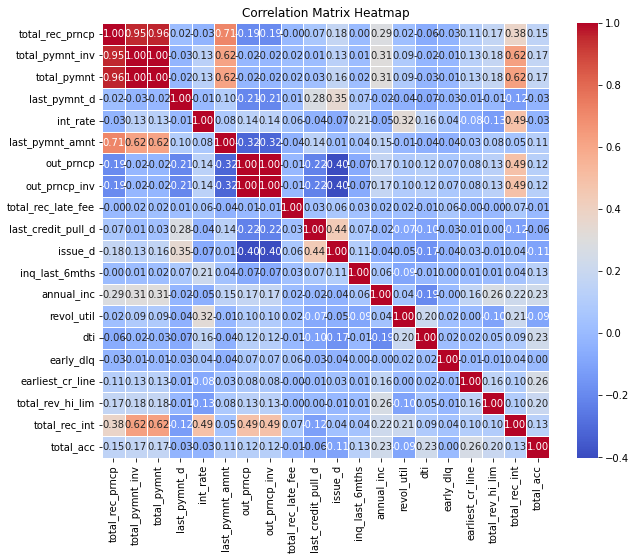

In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming df contains your dataset)
# Replace this with your dataset
# df = pd.read_csv('your_dataset.csv')

# Create a subset of the dataframe with the selected features
subset_df = X_train_num[selected_features]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [154]:
# Set the correlation threshold (e.g., 0.7)
correlation_threshold = 0.7

# Find and eliminate highly correlated features
correlation_matrix = subset_df.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

# Drop the highly correlated features
subset_df_filtered = subset_df.drop(columns=to_drop)

# Display the remaining features
print("Remaining features after eliminating highly correlated features:")
print(subset_df_filtered.columns)

Remaining features after eliminating highly correlated features:
Index(['total_rec_prncp', 'last_pymnt_d', 'int_rate', 'out_prncp',
       'total_rec_late_fee', 'last_credit_pull_d', 'issue_d', 'inq_last_6mths',
       'annual_inc', 'revol_util', 'dti', 'early_dlq', 'earliest_cr_line',
       'total_rev_hi_lim', 'total_rec_int', 'total_acc'],
      dtype='object')


## Categorical Selection

In [155]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in X_train_cat.columns:
    label_encoders[column] = LabelEncoder()
    X_train_cat[column] = label_encoders[column].fit_transform(X_train_cat[column])

chi2_values, p_values = chi2(X_train_cat, y_train)

In [156]:
# Create a DataFrame to store chi-squared values and p-values for each feature
chi2_df = pd.DataFrame({'Feature': X_train_cat.columns, 'Chi2 Value': chi2_values, 'P-value': p_values})

# Sort features based on chi-squared values in descending order
sorted_chi2_features = chi2_df.sort_values(by='Chi2 Value', ascending=False)

# Print sorted features based on chi-squared values and p-values
print("Features sorted based on chi-squared values and p-values:")
print(sorted_chi2_features)

Features sorted based on chi-squared values and p-values:
               Feature    Chi2 Value        P-value
2            sub_grade  35687.794105   0.000000e+00
1                grade   8511.311406   0.000000e+00
5              purpose   1190.404996  7.422806e-261
0                 term    905.961016  4.965604e-199
3       home_ownership    887.040808  6.441929e-195
6  initial_list_status    478.352499  4.877952e-106
4  verification_status    400.655053   3.965867e-89


In [157]:
# take top 20, and ignore high p-values (>0.05)
selected_cat_features = sorted_chi2_features[sorted_features['p-value'] < 0.05].head(20).Feature.tolist()

print(selected_cat_features)

['sub_grade', 'grade', 'purpose', 'term', 'home_ownership', 'initial_list_status', 'verification_status']


/var/folders/rp/svy321qd3lv_hlkfndpyd3hr0000gn/T/ipykernel_38696/3032095689.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_cat_features = sorted_chi2_features[sorted_features['p-value'] < 0.05].head(20).Feature.tolist()


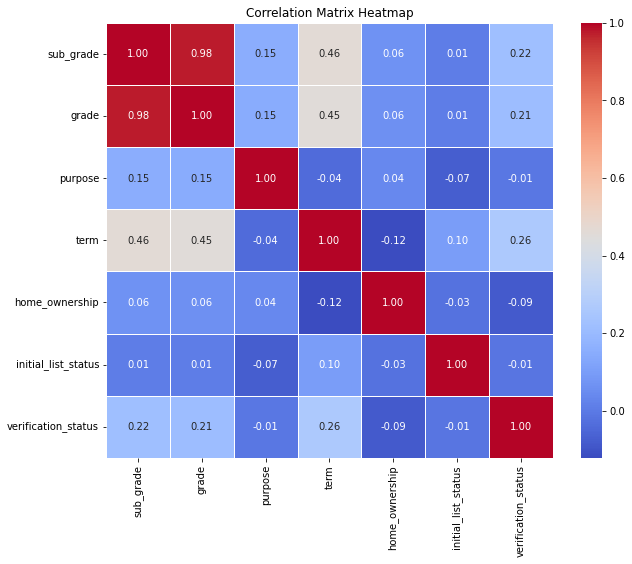

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (assuming df contains your dataset)
# Replace this with your dataset
# df = pd.read_csv('your_dataset.csv')

# Create a subset of the dataframe with the selected features
subset_df = X_train_cat[selected_cat_features]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [166]:
# Set the correlation threshold (e.g., 0.7)
correlation_threshold = 0.7

# Find and eliminate highly correlated features
correlation_matrix = subset_df.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]

# Drop the highly correlated features
subset_df_filtered_cat = subset_df.drop(columns=to_drop)

# Display the remaining features
print("Remaining features after eliminating highly correlated features:")
print(subset_df_filtered_cat.columns)

Remaining features after eliminating highly correlated features:
Index(['sub_grade', 'purpose', 'term', 'home_ownership', 'initial_list_status',
       'verification_status'],
      dtype='object')


## Combine the features

In [167]:
selected_features = subset_df_filtered.columns.tolist() + subset_df_filtered_cat.columns.tolist()
print(selected_features)

['total_rec_prncp', 'last_pymnt_d', 'int_rate', 'out_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'issue_d', 'inq_last_6mths', 'annual_inc', 'revol_util', 'dti', 'early_dlq', 'earliest_cr_line', 'total_rev_hi_lim', 'total_rec_int', 'total_acc', 'sub_grade', 'purpose', 'term', 'home_ownership', 'initial_list_status', 'verification_status']


In [183]:
X_train = X_train[selected_features]

In [184]:
cat_cols = X_train.select_dtypes(include = "object").columns.tolist()
num_cols = X_train.select_dtypes(include = "number").columns.tolist()

In [185]:
X_train_dummies = pd.get_dummies(X_train, columns = cat_cols)

In [164]:
further_columns_to_drop = ['application_type', 'pymnt_plan']

In [165]:
df[df.pymnt_plan == 'y']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,label,early_dlq


In [186]:
X_train_dummies

,total_rec_prncp,last_pymnt_d,int_rate,out_prncp,total_rec_late_fee,last_credit_pull_d,issue_d,inq_last_6mths,annual_inc,revol_util,dti,early_dlq,earliest_cr_line,total_rev_hi_lim,total_rec_int,total_acc,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_f,initial_list_status_w,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
198726,28000.00,71,21.49,0.00,0.0,58,95,2.0,200000.00,89.2,13.17,0,265,48100.0,10539.37,17.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1
391686,7385.62,55,12.49,7114.38,0.0,55,75,0.0,56000.00,56.7,21.37,0,308,12000.0,2314.58,14.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
450718,12650.00,73,16.99,0.00,0.0,74,79,2.0,52700.00,27.3,14.71,0,250,19600.0,856.48,21.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
265932,1766.66,55,10.15,3233.34,0.0,55,69,0.0,24000.00,73.1,24.40,0,218,5100.0,494.18,12.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
257468,3470.35,55,11.99,6529.65,0.0,55,69,0.0,35000.00,70.0,9.40,0,173,11800.0,1169.06,13.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264027,2081.81,55,14.49,9918.19,0.0,55,69,1.0,175000.00,19.6,10.65,0,370,47700.0,1925.06,55.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
74271,10000.00,63,6.03,0.00,0.0,55,82,0.0,60000.00,33.9,23.91,0,220,58800.0,744.98,48.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
77445,9490.88,55,6.97,3509.12,0.0,55,82,2.0,47580.14,18.9,20.37,0,271,105200.0,1341.17,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
99939,11200.00,59,15.22,0.00,0.0,60,84,0.0,42000.00,65.1,11.69,0,337,10000.0,2941.75,16.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1


# Calculate WOE 

**Weight of Evidence (WOE)** and **Information Value (IV)** are important concepts used extensively in credit risk modeling and related domains. Let's delve into what these metrics are and why they are crucial in credit risk assessment:

### Weight of Evidence (WOE):

**Definition:**
Weight of Evidence (WOE) is a measure that quantifies the "strength" of the relationship between a predictive variable (e.g., a credit feature) and the likelihood of a binary outcome (e.g., defaulting on a loan or not). It is computed using the natural logarithm of the ratio of the proportion of events (defaults) to the proportion of non-events (non-defaults) for each category of the variable.

**Purpose and Importance:**
- **Monotonicity:** WOE ensures that the relationship between the predictive variable and the target variable is monotonic, a critical assumption for many models.
- **Interpretability:** WOE provides a way to transform raw categorical features into a continuous, easily interpretable scale.
- **Variable Selection:** It aids in feature selection by identifying the predictive power of each category within a variable.
- **Binning and Discretization:** WOE is often used in the process of binning or discretizing continuous variables into meaningful categories.

### Information Value (IV):

**Definition:**
Information Value (IV) is a single, concise metric that summarizes the predictive power of a variable in a classification model. It is calculated by summing up the differences between the proportion of non-events and the proportion of events for each category, weighted by the WOE.

**Purpose and Importance:**
- **Predictive Power:** IV provides a clear measure of how well a variable can predict the target. Higher IV implies higher predictive power.
- **Variable Selection:** It helps prioritize and select the most important features for modeling, aiding in reducing dimensionality and improving model efficiency.
- **Model Evaluation:** IV can be used to compare the predictive power of different features and evaluate model performance during feature engineering.

### Why Are They Useful for Credit Risk?

In credit risk assessment, accurate prediction of the likelihood of default is crucial for sound lending decisions. WOE and IV are highly useful in this domain for several reasons:

1. **Risk Segmentation:** WOE helps in categorizing customers into risk segments based on the characteristics of their credit profiles. This allows for customized risk assessment and pricing strategies.

2. **Model Development:** IV guides the selection of the most predictive credit features, enhancing the accuracy and robustness of credit risk models.

3. **Regulatory Compliance:** Both WOE and IV provide transparent methods to demonstrate the effectiveness and fairness of credit scoring models, which is essential for regulatory compliance and avoiding bias in lending practices.

4. **Business Strategy:** Understanding the WOE and IV of various credit features enables banks to develop strategies that balance risk and profitability, optimizing their lending portfolios.

In summary, WOE and IV are fundamental tools in credit risk assessment, enabling precise risk evaluation, informed lending decisions, and regulatory compliance. Their effective utilization contributes to a more robust and reliable credit risk management framework.

In [187]:
import pandas as pd
import numpy as np

def calculate_woe_iv(data, attribute, target):
    """
    Calculate Weight of Evidence (WOE) and Information Value (IV) for each category in a categorical attribute.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    attribute (str): Name of the categorical attribute.
    target (str): Name of the target variable.

    Returns:
    woe_iv_df (DataFrame): DataFrame with WOE and IV for each category.
    """

    # Calculate the total count of positive and negative cases
    total_positive = data[target].sum()
    total_negative = len(data) - total_positive

    # Calculate the total count for each category in the attribute
    category_counts = data.groupby(attribute)[target].agg(['sum', 'count'])
    category_counts.rename(columns={'sum': 'positive', 'count': 'total'}, inplace=True)

    # Calculate the proportion of positive cases for each category
    category_counts['proportion_positive'] = category_counts['positive'] / total_positive

    # Calculate the proportion of negative cases for each category
    category_counts['proportion_negative'] = (category_counts['total'] - category_counts['positive']) / total_negative

    # Calculate WOE and IV
    category_counts['woe'] = np.log(category_counts['proportion_positive'] / category_counts['proportion_negative'])
    category_counts['iv'] = (category_counts['proportion_positive'] - category_counts['proportion_negative']) * category_counts['woe']

    # Sort by WOE in ascending order
    woe_iv_df = category_counts.sort_values(by='woe', ascending=True)

    return woe_iv_df

# Sample usage
# Replace df with your DataFrame, 'attribute' with the categorical attribute, and 'label' with the target variable
# woe_iv_result = calculate_woe_iv(df, 'attribute', 'label')
# print(woe_iv_result)


In [ ]:
df_woe_grade = calculate_woe_iv(df, "grade", "label")
print(df_woe_grade)

In [202]:
import matplotlib.pyplot as plt

def plot_woe(woe_iv_df):
    """
    Plot WOE (Weight of Evidence) as a line plot for each category in a categorical attribute.

    Parameters:
    woe_iv_df (DataFrame): DataFrame containing WOE and IV values.

    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(woe_iv_df.index, woe_iv_df['woe'], marker='o', linestyle='-', label='WOE')
    plt.xlabel(woe_iv_df.index.name)
    plt.ylabel('Weight of Evidence (WOE)')
    plt.title('WOE for each category')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Sample usage
# Replace woe_iv_result with the DataFrame containing WOE and IV values
# plot_woe(woe_iv_result)

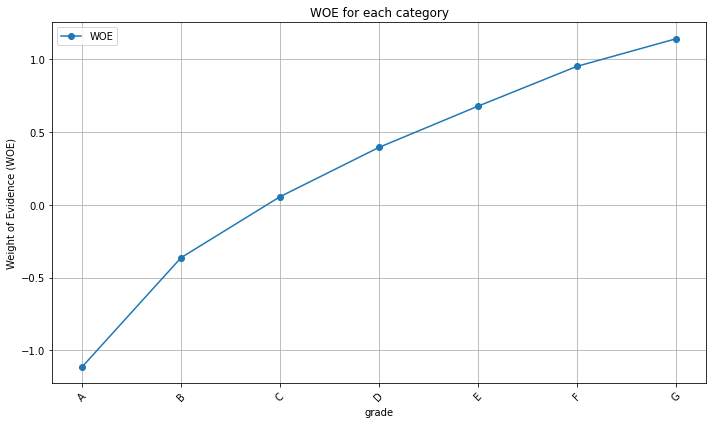

In [203]:
plot_woe(df_woe_grade)

In [218]:
import math

def plot_woe_grid(data, categorical_vars, target):
    """
    Plot WOE (Weight of Evidence) for each category in the specified categorical variables.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    categorical_vars (list): List of categorical variable names.
    target (str): Name of the target variable.

    Returns:
    None
    """
    num_plots = len(categorical_vars)
    num_rows = math.ceil(num_plots / 4)
    fig, axes = plt.subplots(num_rows, 4, figsize=(16, num_rows * 4))

    for i, var in enumerate(categorical_vars):
        row = i // 4
        col = i % 4
        ax = axes[row, col] if num_rows > 1 else axes[col]
        
        woe_iv_df = calculate_woe_iv(data, var, target)
        ax.plot(woe_iv_df.index, woe_iv_df['woe'], marker='o', linestyle='-', label='WOE')
        ax.set_xlabel(var)
        ax.set_ylabel('Weight of Evidence (WOE)')
        ax.set_title('WOE for {}'.format(var))
        ax.legend()
        ax.grid(True)

    # Remove empty subplots
    for i in range(num_plots, num_rows * 4):
        row = i // 4
        col = i % 4
        fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

    plt.tight_layout()
    plt.show()

# Sample usage
# Replace df with your DataFrame, categorical_vars with the list of categorical variables, and 'target' with the target variable
# plot_woe_grid(df, categorical_vars=['categorical_var1', 'categorical_var2'], target='target_variable')


/Users/leisun/coding/credit_risk_modelling/.env/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


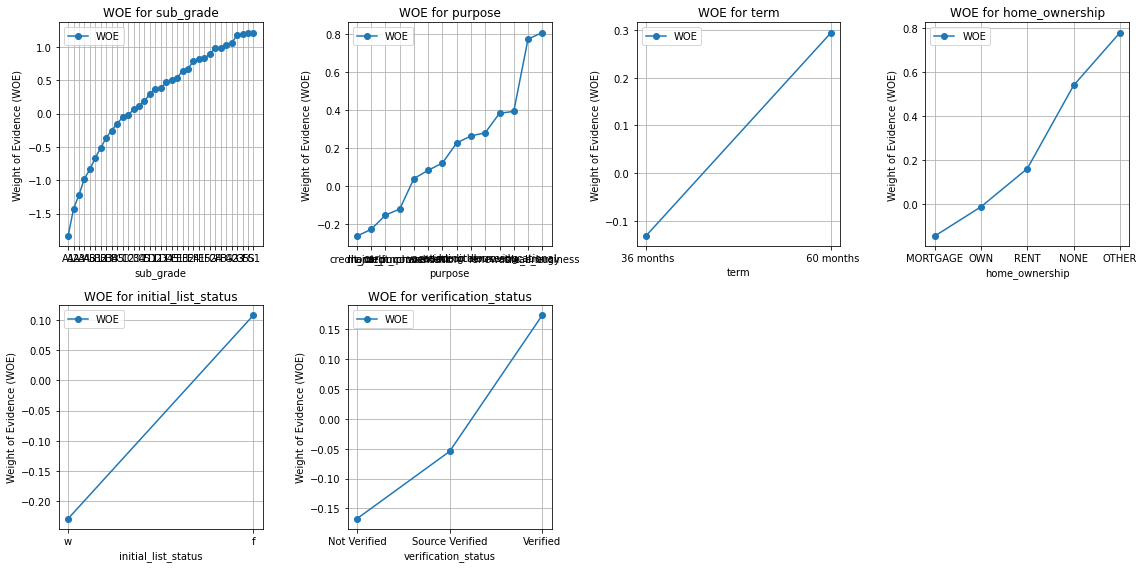

In [219]:
plot_woe_grid(df, categorical_vars=cat_cols, target='label')

## Creating Bins



In [220]:

import numpy as np

def optimize_woe(data, attribute, target, max_bins=10):
    """
    Optimize binning for a numeric attribute by maximizing the difference in WOE.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    attribute (str): Name of the numeric attribute to be optimized.
    target (str): Name of the target variable.
    max_bins (int): Maximum number of bins to consider (default is 10).

    Returns:
    optimal_bins (list): List of optimal bin boundaries.
    """
    # Get the unique values of the attribute and sort them
    unique_values = sorted(data[attribute].unique())
    
    # Initialize with each unique value as a bin boundary
    initial_bins = [[val] for val in unique_values]
    
    # Calculate WOE for the initial bins
    initial_woe = []
    for bin_boundaries in initial_bins:
        subset = data[data[attribute].apply(lambda x: any(x <= boundary for boundary in bin_boundaries))]
        woe = calculate_woe_iv(subset, attribute, target)['woe'].values[0]
        initial_woe.append(woe)
    
    # Initialize the best WOE to the minimum possible
    best_woe = float('-inf')
    optimal_bins = None
    
    # Iterate over the number of bins from 2 to max_bins
    for num_bins in range(2, min(len(unique_values), max_bins) + 1):
        # Generate all possible bin combinations with num_bins
        bin_combinations = np.array_split(unique_values, num_bins)
        
        # Calculate WOE for each bin combination
        current_woe = []
        for bin_boundaries in bin_combinations:
            subset = data[data[attribute].apply(lambda x: any(x <= boundary for boundary in bin_boundaries))]
            woe = calculate_woe_iv(subset, attribute, target)['woe'].values[0]
            current_woe.append(woe)
        
        # Calculate the total WOE for this combination
        total_woe = sum(current_woe)
        
        # Update optimal bins if the total WOE is better
        if total_woe > best_woe:
            best_woe = total_woe
            optimal_bins = bin_combinations
    
    return [boundaries[-1] for boundaries in optimal_bins]

# Sample usage
# Replace df with your DataFrame, 'attribute' with the numeric attribute, and 'target' with the target variable
# optimal_bins = optimize_woe(df, 'attribute', 'target', max_bins=10)
# print("Optimal bins:", optimal_bins

In [224]:
import pandas as pd
import numpy as np

def bin_numeric_variables(data, numeric_vars, num_bins=5, binning_method='quantile', optimize_woe=False):
    """
    Bins numeric variables in a DataFrame into discrete categories.

    Parameters:
    data (DataFrame): Input DataFrame containing the data.
    numeric_vars (list): List of numeric variable names to be binned.
    num_bins (int): Number of bins to create (default is 5).
    binning_method (str): Binning method, either 'quantile' (default) or 'equal_width'.
    optimize_woe (bool): Whether to optimize binning based on WOE (default is False).

    Returns:
    binned_data (DataFrame): DataFrame with binned numeric variables.
    """
    binned_data = data.copy()

    for var in numeric_vars:
        if optimize_woe:
            optimal_bins = optimize_woe(data, var, target='target', max_bins=num_bins)
            bins = np.digitize(data[var], bins=optimal_bins, right=True)
        else:
            if binning_method == 'quantile':
                bins, bin_edges = pd.qcut(data[var], q=num_bins, labels=False, retbins=True, duplicates='drop')
            elif binning_method == 'equal_width':
                bins, bin_edges = pd.cut(data[var], bins=num_bins, labels=False, retbins=True)
            else:
                raise ValueError("Invalid binning method. Choose either 'quantile' or 'equal_width'.")
            
            # Create bin labels based on bin boundaries
            bin_labels = [f'{bin_edges[i]:.2f}-{bin_edges[i+1]:.2f}' for i in range(len(bin_edges) - 1)]
            binned_data[var] = pd.cut(data[var], bins=bin_edges, labels=bin_labels, include_lowest=True)
    
    return binned_data

# Sample usage
# Replace df with your DataFrame, numeric_vars with the list of numeric variables to be binned
# binned_data = bin_numeric_variables(df, numeric_vars=['age', 'income'], num_bins=5, binning_method='quantile', optimize_woe=True)
# print(binned_data)


In [226]:
X_train_new = bin_numeric_variables(X_train, num_cols)

In [ ]:
X_train_new.groupby('total_rec_prncp').value_counts().sort_values()